# Projet Savoir Programmer

## Existe-t-il une corrélation entre le nombre de vélos et voitures en circulation, et la qualité de l’air à Montréal?

### Noms: 
- Karen Assi
- Dylan Jasaron
- Lea Roller
- Janine Hamdoun

### Source des données: 
- La Qualité de l'air: https://donnees.montreal.ca/dataset/rsqa-iqa-historique
- Les vélos: https://donnees.montreal.ca/dataset/velos-comptage
- Les voitures: https://donnees.montreal.ca/dataset/comptage-vehicules-pietons


### Mise en situation:
Dans un contexte où l'utilisation des vélos est souvent encouragée pour ses bénéfices environnementaux, les discours affirment fréquemment que l'augmentation de l'usage des vélos pourrait contribuer à améliorer la qualité de l'air. En parallèle, la circulation accrue des voitures est souvent associée à une détérioration de la qualité de l'air dans les zones urbaines. Nous voulons valider les discours et perceptions. 

### Nos apprentissages:
Les apprentissages que nous avons fait avec Python dans le cadre de notre projet sont les suivants. 
- Nous avons gagné en connaissance sur l’utilisation de bibliothèque Pandas pour collecter, nettoyer, fusionner les données en plusieurs DataFrames qui sont cohérents ; pour des données provenant de fichiers CSV.

- Nous avons assimilé l’utilisation de Pandas pour calculer les statistiques descriptives telles que la moyenne, l'écart-type, le min, le max et la médiane des variables de la qualité de l'air, du nombre de vélos et de voitures.

- Nous avons développé une compréhension de l’utilisation de Matplotlib et Seaborn pour créer des graphiques temporels montrant l'évolution des moyennes des variables au fil des années et des saisons. De plus, on a appris à créer une carte géographique avec Folium pour localiser les stations de comptage des véhicules et vélos à Montréal.

- Nous avons découvert comment utiliser Pandas pour calculer la corrélation linéaire et de Spearman entre les variables, et nous avons appris à interpréter les corrélations. De plus, on a appris avec Numpy à calculer des régressions pour déterminer les relations potentielles entre la qualité de l'air et le nombre de voitures et vélos.

- Nous avons compris comment gérer les données manquantes, les limitations de notre méthodologie et les biais potentiels dans notre analyse des données.

- On a appris que c’est difficile de déterminer si le nombre de vélos en circulation ont un impact sur la qualité de l’air, et pareillement pour le nombre de voitures sur la qualité de l’air. Nos quatre analyses ont donné des résultats différents, par conséquent on ne peut pas affirmer ou contredire les perceptions sur le sujet. On a compris que cela est plus dû à la quantité de données manquantes dans notre étude. 



In [1]:
# nous importons tous les programmes nécessaires 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

#C'est optionel pour calculer des regressions 
import numpy as np
import statsmodels.api as sm  

In [2]:
#!pip install --upgrade pandas

## Nettoyer des donnés
Avant de commencer à calculer quoi que ce soit, nous devons nettoyer et fusionner les fiches de données. Comme il s'agit d'étapes répétitives, nous n'avons inclus les explications que pour la première fois que nous passons par cette étape spécifique.
### Qualité Air
2007-2009

In [3]:
#lire les données
df_qualiteair2007_2009 = pd.read_csv('rsqa-indice-qualite-air-secteur-2007-2009.csv')

df_qualiteair2007_2009.head()

,secteur,valeur,date,heure
0,Centre-ville,6,04/07/2009,10
1,Nord,7,04/07/2009,11
2,Est,4,04/07/2009,11
3,Ouest,4,04/07/2009,11
4,Centre-ville,7,04/07/2009,11


In [4]:
#Vérifier le type de données
print(df_qualiteair2007_2009.dtypes)
#date n'est pas au format date, nous allons donc forcer la date à y figurer

df_qualiteair2007_2009['date'] = pd.to_datetime(df_qualiteair2007_2009['date'], format='%d/%m/%Y')

#data est au format date maintenant 
print(df_qualiteair2007_2009.dtypes)

secteur    object
valeur      int64
date       object
heure       int64
dtype: object
secteur            object
valeur              int64
date       datetime64[ns]
heure               int64
dtype: object


In [5]:
#nous voulons agréger les chiffres par jour ; nous devons donc d'abord filtrer les différents secteurs
selected_sectors = ['East', 'West', 'Est', 'Centre-ville']
df_selected_sectors = df_qualiteair2007_2009[df_qualiteair2007_2009['secteur'].isin(selected_sectors)]

# calculer les moyennes par jour 
average_values2007_2009 = df_selected_sectors.groupby('date')['valeur'].mean().reset_index()

# renommer les colonnes 
average_values2007_2009 = average_values2007_2009.rename({'valeur': 'Moyenne'}, axis = 1)
average_values2007_2009 = average_values2007_2009.rename({'date': 'Date'}, axis = 1)

# afficher le résultat
df_average_values2007_2009 = pd.DataFrame(average_values2007_2009)

df_average_values2007_2009

,Date,Moyenne
0,2007-01-01,17.416667
1,2007-01-02,15.625000
2,2007-01-03,13.958333
3,2007-01-04,18.583333
4,2007-01-05,20.125000
...,...,...
1091,2009-12-27,19.020833
1092,2009-12-28,22.291667
1093,2009-12-29,18.729167
1094,2009-12-30,20.687500


2010-2012

Nous devons répéter toutes les étapes pour les autres ensembles de données. Nous ne répéterons pas les explications ici car c'est exactement la même chose que les autres étapes, juste une feuille de données différente. 

In [6]:
df_qualiteair2010_2012 = pd.read_csv('rsqa-indice-qualite-air-secteur-2010-2012.csv')

df_qualiteair2010_2012.head()

,secteur,valeur,date,heure
0,Centre-ville,42,21/04/2010,20
1,Nord,18,21/04/2010,21
2,Est,23,21/04/2010,21
3,Ouest,26,21/04/2010,21
4,Centre-ville,35,21/04/2010,21


In [7]:
print(df_qualiteair2010_2012.dtypes)

df_qualiteair2010_2012['date'] = pd.to_datetime(df_qualiteair2010_2012['date'])

print(df_qualiteair2010_2012.dtypes)

secteur    object
valeur      int64
date       object
heure       int64
dtype: object
secteur            object
valeur              int64
date       datetime64[ns]
heure               int64
dtype: object


C:\Users\Lea Röller\AppData\Local\Temp\ipykernel_7244\4229842912.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_qualiteair2010_2012['date'] = pd.to_datetime(df_qualiteair2010_2012['date'])


In [8]:
selected_sectors = ['East', 'West', 'Est', 'Centre-ville']
df_selected_sectors = df_qualiteair2010_2012[df_qualiteair2010_2012['secteur'].isin(selected_sectors)]

average_values2010_2012 = df_selected_sectors.groupby('date')['valeur'].mean().reset_index()

average_values2010_2012 = average_values2010_2012.rename({'valeur': 'Moyenne'}, axis = 1)
average_values2010_2012 = average_values2010_2012.rename({'date': 'Date'}, axis = 1)

df_average_values2010_2012 = pd.DataFrame(average_values2010_2012)

df_average_values2010_2012.head()

,Date,Moyenne
0,2010-01-01,27.916667
1,2010-01-02,17.437500
2,2010-01-03,17.062500
3,2010-01-04,16.250000
4,2010-01-05,14.166667


2013-2015

In [9]:
df_qualiteair2013_2015 = pd.read_csv('rsqa-indice-qualite-air-secteur-2013-2015.csv')

df_qualiteair2013_2015.head()

,secteur,valeur,date,heure
0,Est,18,20/07/2014,0
1,Nord,17,20/07/2014,0
2,Ouest,17,20/07/2014,0
3,Centre-ville,22,20/07/2014,1
4,Est,17,20/07/2014,1


In [10]:
print(df_qualiteair2013_2015.dtypes)

df_qualiteair2013_2015['date'] = pd.to_datetime(df_qualiteair2013_2015['date'])

print(df_qualiteair2013_2015.dtypes)

secteur    object
valeur      int64
date       object
heure       int64
dtype: object
secteur            object
valeur              int64
date       datetime64[ns]
heure               int64
dtype: object


C:\Users\Lea Röller\AppData\Local\Temp\ipykernel_7244\356088834.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_qualiteair2013_2015['date'] = pd.to_datetime(df_qualiteair2013_2015['date'])


In [11]:
selected_sectors = ['East', 'West', 'Est', 'Centre-ville']
df_selected_sectors = df_qualiteair2013_2015[df_qualiteair2013_2015['secteur'].isin(selected_sectors)]

average_values2013_2015 = df_selected_sectors.groupby('date')['valeur'].mean().reset_index()

average_values2013_2015 = average_values2013_2015.rename({'valeur': 'Moyenne'}, axis = 1)
average_values2013_2015 = average_values2013_2015.rename({'date': 'Date'}, axis = 1)

df_average_values2013_2015 = pd.DataFrame(average_values2013_2015)

df_average_values2013_2015.head()

,Date,Moyenne
0,2013-01-01,18.916667
1,2013-01-02,17.312500
2,2013-01-03,19.562500
3,2013-01-04,29.895833
4,2013-01-05,20.000000


2016-2018

In [12]:
df_qualiteair2016_2018 = pd.read_csv('rsqa-indice-qualite-air-secteur-2016-2018.csv')

df_qualiteair2016_2018.head()

,secteur,valeur,date,heure
0,Est,18,23/11/2017,0
1,Nord,17,23/11/2017,0
2,Ouest,20,23/11/2017,0
3,Centre-ville,16,22/11/2017,23
4,Est,17,22/11/2017,23


In [13]:
print(df_qualiteair2016_2018.dtypes)

df_qualiteair2016_2018['date'] = pd.to_datetime(df_qualiteair2016_2018['date'])

print(df_qualiteair2016_2018.dtypes)

secteur    object
valeur      int64
date       object
heure       int64
dtype: object
secteur            object
valeur              int64
date       datetime64[ns]
heure               int64
dtype: object


C:\Users\Lea Röller\AppData\Local\Temp\ipykernel_7244\1613169965.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_qualiteair2016_2018['date'] = pd.to_datetime(df_qualiteair2016_2018['date'])


In [14]:
selected_sectors = ['East', 'West', 'Est', 'Centre-ville']
df_selected_sectors = df_qualiteair2016_2018[df_qualiteair2016_2018['secteur'].isin(selected_sectors)]

average_values2016_2018 = df_selected_sectors.groupby('date')['valeur'].mean().reset_index()

average_values2016_2018 = average_values2016_2018.rename({'valeur': 'Moyenne'}, axis = 1)
average_values2016_2018 = average_values2016_2018.rename({'date': 'Date'}, axis = 1)

df_average_values2016_2018 = pd.DataFrame(average_values2016_2018)

df_average_values2016_2018.head()

,Date,Moyenne
0,2016-01-01,18.750000
1,2016-01-02,18.979167
2,2016-01-03,23.750000
3,2016-01-04,16.104167
4,2016-01-05,15.895833


2019-2021

In [15]:
df_qualiteair2019_2021 = pd.read_csv('rsqa-indice-qualite-air-secteur-2019-2021.csv')

df_qualiteair2019_2021.head()

,secteur,valeur,date,heure
0,Centre-ville,20,28/01/2019,2
1,Est,23,28/01/2019,2
2,Nord,22,28/01/2019,2
3,Ouest,22,28/01/2019,2
4,Centre-ville,20,28/01/2019,1


In [16]:
print(df_qualiteair2019_2021.dtypes)

df_qualiteair2019_2021['date'] = pd.to_datetime(df_qualiteair2019_2021['date'])

print(df_qualiteair2019_2021.dtypes)

secteur    object
valeur      int64
date       object
heure       int64
dtype: object
secteur            object
valeur              int64
date       datetime64[ns]
heure               int64
dtype: object


C:\Users\Lea Röller\AppData\Local\Temp\ipykernel_7244\3733743538.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_qualiteair2019_2021['date'] = pd.to_datetime(df_qualiteair2019_2021['date'])


In [17]:
selected_sectors = ['East', 'West', 'Est', 'Centre-ville']
df_selected_sectors = df_qualiteair2019_2021[df_qualiteair2019_2021['secteur'].isin(selected_sectors)]

average_values2019_2021 = df_selected_sectors.groupby('date')['valeur'].mean().reset_index()

average_values2019_2021 = average_values2019_2021.rename({'valeur': 'Moyenne'}, axis = 1)
average_values2019_2021 = average_values2019_2021.rename({'date': 'Date'}, axis = 1)

df_average_values2019_2021 = pd.DataFrame(average_values2019_2021)

df_average_values2019_2021.head()

,Date,Moyenne
0,2019-01-01,18.020833
1,2019-01-02,18.333333
2,2019-01-03,21.166667
3,2019-01-04,25.062500
4,2019-01-05,37.312500


2022-2024

In [18]:
df_qualiteair2022_2024 = pd.read_csv('rsqa-indice-qualite-air-secteur-2022-2024.csv')

df_qualiteair2022_2024.head()

,secteur,valeur,date,heure
0,Ouest,16,09/09/2023,16
1,Centre-ville,16,09/09/2023,15
2,Est,16,09/09/2023,15
3,Nord,17,09/09/2023,15
4,Ouest,15,09/09/2023,15


In [19]:
print(df_qualiteair2022_2024.dtypes)

df_qualiteair2022_2024['date'] = pd.to_datetime(df_qualiteair2022_2024['date'], format='%d/%m/%Y')

print(df_qualiteair2022_2024.dtypes)

secteur    object
valeur      int64
date       object
heure       int64
dtype: object
secteur            object
valeur              int64
date       datetime64[ns]
heure               int64
dtype: object


In [20]:
selected_sectors = ['East', 'West', 'Est', 'Centre-ville']
df_selected_sectors = df_qualiteair2022_2024[df_qualiteair2022_2024['secteur'].isin(selected_sectors)]

average_values2022_2024 = df_selected_sectors.groupby('date')['valeur'].mean().reset_index()

average_values2022_2024 = average_values2022_2024.rename({'valeur': 'Moyenne'}, axis = 1)
average_values2022_2024= average_values2022_2024.rename({'date': 'Date'}, axis = 1)

df_average_values2022_2024 = pd.DataFrame(average_values2022_2024)

df_average_values2022_2024.head()

,Date,Moyenne
0,2022-01-01,51.187500
1,2022-01-02,19.500000
2,2022-01-03,19.645833
3,2022-01-04,20.000000
4,2022-01-05,27.645833


Maintenant, nous allons fusionner toutes les sous-fiches séparées en une seule base de données

In [21]:
#créer une liste avec les DataFrames que nous voulons connecter
average_values_list = [df_average_values2007_2009, df_average_values2010_2012, df_average_values2013_2015, df_average_values2016_2018, df_average_values2019_2021, df_average_values2022_2024]

#Créer une variable où on peut stocker les listes pour créer une nouvelle DataFrame
combined_average_values = pd.concat(average_values_list, ignore_index=True)

# Afficher le résultat
combined_average_values.head()

,Date,Moyenne
0,2007-01-01,17.416667
1,2007-01-02,15.625000
2,2007-01-03,13.958333
3,2007-01-04,18.583333
4,2007-01-05,20.125000


In [22]:
#s'assurer que nous disposons d'un type de date commun
combined_average_values['Date'] = pd.to_datetime(combined_average_values['Date'])

#définir un intervalle de données - nous voulons commencer en 2009 et finir en 2022 parce que d'autres ensembles de données sont limités à cet intervalle 
start_date = '2009-01-01'
end_date = '2022-12-31'

# Filtrer le DataFrame sur la base de l'intervalle de dates
filtered_airqualite = combined_average_values.loc[(combined_average_values['Date'] >= start_date) & (combined_average_values['Date'] <= end_date)]

# Afficher le résultat
filtered_airqualite.head()

,Date,Moyenne
731,2009-01-01,17.083333
732,2009-01-02,28.208333
733,2009-01-03,23.187500
734,2009-01-04,19.166667
735,2009-01-05,23.375000


In [23]:
#Faire un tableau joli
df_filtered_airqualite = pd.DataFrame(filtered_airqualite)

df_filtered_airqualite = df_filtered_airqualite[['Date', 'Moyenne']]

df_filtered_airqualite = df_filtered_airqualite.rename(columns={'Date': 'Date', 'Moyenne': 'Air Qualité'})

df_filtered_airqualite

,Date,Air Qualité
731,2009-01-01,17.083333
732,2009-01-02,28.208333
733,2009-01-03,23.187500
734,2009-01-04,19.166667
735,2009-01-05,23.375000
...,...,...
5839,2022-12-27,18.479167
5840,2022-12-28,21.541667
5841,2022-12-29,37.166667
5842,2022-12-30,23.166667


### Comptages des Vélos 

Maintenant, nous allons regarder les fiches de données où nous comptons les occurrences de vélos. On commence par comparer l'ensemble des données de 2009 à celles de 2022 : quelque chose a changé ?

In [24]:
#la base des données pour 2009
df_vélos2009 = pd.read_csv('comptagevelo2009.csv')

# Afficher
print(df_vélos2009)

# seulement trois stations (la 4ème n'a des données que plus tard dans l'année) ; cela signifie que nous nous concentrerons sur Berri1 et Maisonneuve_1 et _2

           Date Unnamed: 1  Berri1  Maisonneuve_1  Maisonneuve_2  Brébeuf
0    01/01/2009      00:00      29             20             35      NaN
1    02/01/2009      00:00      19              3             22      NaN
2    03/01/2009      00:00      24             12             22      NaN
3    04/01/2009      00:00      24              8             15      NaN
4    05/01/2009      00:00     120            111            141      NaN
..          ...        ...     ...            ...            ...      ...
360  27/12/2009      00:00      66             29             52      0.0
361  28/12/2009      00:00      61             41             99      0.0
362  29/12/2009      00:00      89             52            115      0.0
363  30/12/2009      00:00      76             43            115      0.0
364  31/12/2009      00:00      53             46            112      0.0

[365 rows x 6 columns]


In [25]:
#la base des données pour 2022
df_vélos2022 = pd.read_csv('comptage_velo_2022.csv')

# Display the result
print(df_vélos2022)

               date     heure  id_compteur  longitude   latitude  nb_passages
0        01/01/2022  00:00:00    100054073 -73.590636  45.560713            0
1        01/01/2022  00:00:00    300021685 -73.613370  45.631590            0
2        01/01/2022  00:00:00    100003040 -73.544410  45.501270            0
3        01/01/2022  00:00:00    100052606 -73.538819  45.555084            0
4        01/01/2022  00:00:00    100003032 -73.562970  45.516216            0
...             ...       ...          ...        ...        ...          ...
1048570  20/07/2022  19:15:00    100041101 -73.684480  45.541680            0
1048571  20/07/2022  19:15:00    100052604 -73.533825  45.466751           15
1048572  20/07/2022  19:15:00    100057500 -73.561379  45.514925            0
1048573  20/07/2022  19:15:00    100011783 -73.609566  45.470493           36
1048574  20/07/2022  19:15:00    100003039 -73.574970  45.500507           91

[1048575 rows x 6 columns]


Il y a une différence dans la façon dont les ensembles de données sont construits, ce qui signifie que nous ne pourrons pas comparer les données dans le temps. La question est de savoir quand le changement dans l'ensemble de données s'est produit. 

Après avoir examiné les différents ensembles de données dans Excel, on peut constater que le changement est intervenu après 2018, c'est-à-dire que l'ensemble de données 2019 était dans le "nouveau format". 

#### Nettoyage des données dans l'ancien format
2009 - 2018

In [26]:
# comparer 2009 à 2018 pour voir si quelque chose a changé dans cet ensemble de données au fil du temps 
df_vélos2018 = pd.read_csv('comptage_velo_2018.csv')

# afficher le résultat
df_vélos2018.head()

#il y a Berri1 mais pas les deux autres variables (Maisonneuve_1 et Maisonneuve_2)
#cela signifie que pour notre analyse, nous ne pouvons utiliser qu'un seul point de comptage, à savoir Berri1
#nous pouvons utiliser Berri1 comme un bon proxy parce qu'il est situé dans le centre ville - cependant, il faut reconnaître que ces données ne permettent pas de savoir, par exemple, quand des constructions ont lieu à Berri1, etc.  

,Date,Unnamed: 1,Berri1,Boyer,Boyer 2,Brébeuf,Christophe-Colomb,CSC (Côte Sainte-Catherine),Eco-Display Parc Stanley,Eco-Totem - Métro Laurier,...,Parc,PierDup,Pont Jacques-Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent/Bellechasse,Saint-Urbain,Viger
0,01/01/2018,00:00,29,30,18.0,2,8.0,7,NaN,52,...,15,0,8.0,40,62,7,3,58,13,NaN
1,02/01/2018,00:00,94,71,32.0,0,6.0,23,NaN,78,...,38,0,5.0,92,144,35,3,143,23,NaN
2,03/01/2018,00:00,200,149,54.0,0,30.0,58,NaN,112,...,76,4,9.0,160,273,62,37,314,21,NaN
3,04/01/2018,00:00,230,156,95.0,2,30.0,67,NaN,157,...,95,2,13.0,212,369,61,23,373,20,NaN
4,05/01/2018,00:00,125,89,33.0,3,2.0,32,NaN,263,...,41,1,3.0,101,209,18,12,160,53,NaN


2009

In [27]:
df_vélos2009 = pd.read_csv('comptagevelo2009.csv')

# Ne conserver que les colonnes 'Date' et 'Berri1'.
df_vélos2009 = df_vélos2009[['Date', 'Berri1']]
df_vélos2009['Date'] = pd.to_datetime(df_vélos2009['Date'], format='%d/%m/%Y')

#Afficher le résultat
print(df_vélos2009)

          Date  Berri1
0   2009-01-01      29
1   2009-01-02      19
2   2009-01-03      24
3   2009-01-04      24
4   2009-01-05     120
..         ...     ...
360 2009-12-27      66
361 2009-12-28      61
362 2009-12-29      89
363 2009-12-30      76
364 2009-12-31      53

[365 rows x 2 columns]


2010

In [28]:
df_vélos2010 = pd.read_csv('comptagevelo2010.csv')

# Ne conserver que les colonnes 'Date' et 'Berri1'.
df_vélos2010 = df_vélos2010[['Date', 'Berri1']]
df_vélos2010['Date'] = pd.to_datetime(df_vélos2010['Date'], format='%d/%m/%Y')

#Afficher le résultat
print(df_vélos2010)

          Date  Berri1
0   2010-01-01      36
1   2010-01-02      28
2   2010-01-03      39
3   2010-01-04     117
4   2010-01-05     225
..         ...     ...
360 2010-12-27      50
361 2010-12-28     120
362 2010-12-29     143
363 2010-12-30     149
364 2010-12-31     105

[365 rows x 2 columns]


2011

In [29]:
df_vélos2011 = pd.read_csv('comptagevelo2011.csv')

# Ne conserver que les colonnes 'Date' et 'Berri1'.
df_vélos2011 = df_vélos2011[['Date', 'Berri1']]
df_vélos2011['Date'] = pd.to_datetime(df_vélos2011['Date'], format='%d/%m/%Y')

# Afficher le résultat
print(df_vélos2011)

          Date  Berri1
0   2011-01-01      81
1   2011-01-02      95
2   2011-01-03     150
3   2011-01-04     232
4   2011-01-05     237
..         ...     ...
360 2011-12-27     117
361 2011-12-28      77
362 2011-12-29      72
363 2011-12-30      74
364 2011-12-31      57

[365 rows x 2 columns]


2012

In [30]:
df_vélos2012 = pd.read_csv('comptagevelo2012.csv')

# Ne conserver que les colonnes 'Date' et 'Berri1'.
df_vélos2012 = df_vélos2012[['Date', 'Berri1']]
df_vélos2012['Date'] = pd.to_datetime(df_vélos2012['Date'], format='%d/%m/%Y')

# Afficher le résultat
print(df_vélos2012)

          Date  Berri1
0   2012-01-01      35
1   2012-01-02      83
2   2012-01-03     135
3   2012-01-04     144
4   2012-01-05     197
..         ...     ...
361 2012-12-27      12
362 2012-12-28      35
363 2012-12-29      27
364 2012-12-30       5
365 2012-12-31       4

[366 rows x 2 columns]


2013

In [31]:
df_vélos2013 = pd.read_csv('comptagevelo2013.csv')

# Ne conserver que les colonnes 'Date' et 'Berri1'.
df_vélos2013 = df_vélos2013[['Date', 'Berri1']]
df_vélos2013['Date'] = pd.to_datetime(df_vélos2013['Date'], format='%d/%m/%Y')

#Afficher le résultat
print(df_vélos2013)

          Date  Berri1
0   2013-01-01       0
1   2013-01-02      69
2   2013-01-03      69
3   2013-01-04      80
4   2013-01-05      52
..         ...     ...
360 2013-12-27      77
361 2013-12-28      36
362 2013-12-29      32
363 2013-12-30      29
364 2013-12-31      14

[365 rows x 2 columns]


2014

In [32]:
df_vélos2014 = pd.read_csv('comptagevelo2014.csv')

# Ne conserver que les colonnes 'Date' et 'Berri1'.
df_vélos2014 = df_vélos2014[['Date', 'Berri1']]
df_vélos2014['Date'] = pd.to_datetime(df_vélos2014['Date'], format='%d/%m/%Y')

#Afficher le résultat
print(df_vélos2014)

          Date  Berri1
0   2014-01-01       9
1   2014-01-02       9
2   2014-01-03      28
3   2014-01-04      27
4   2014-01-05      55
..         ...     ...
360 2014-12-27     239
361 2014-12-28     249
362 2014-12-29     158
363 2014-12-30     165
364 2014-12-31     118

[365 rows x 2 columns]


2015

In [33]:
df_vélos2015 = pd.read_csv('comptagevelo20152.csv')

# Ne conserver que les colonnes 'Date' et 'Berri1'.
df_vélos2015 = df_vélos2015[['Date', 'Berri1']]
df_vélos2015['Date'] = pd.to_datetime(df_vélos2015['Date'], format='%d/%m/%Y')

#Afficher le résultat
print(df_vélos2015)

          Date  Berri1
0   2015-01-01      58
1   2015-01-02      75
2   2015-01-03      79
3   2015-01-04      10
4   2015-01-05      42
..         ...     ...
360 2015-12-27      70
361 2015-12-28      86
362 2015-12-29      17
363 2015-12-30      78
364 2015-12-31      80

[365 rows x 2 columns]


2016

In [34]:
df_vélos2016 = pd.read_csv('comptagevelo20162.csv')

# Ne conserver que les colonnes 'Date' et 'Berri1'.
df_vélos2016 = df_vélos2016[['Date', 'Berri1']]
df_vélos2016['Date'] = pd.to_datetime(df_vélos2016['Date'], format='%d/%m/%Y')

#Afficher le résultat
print(df_vélos2016)

          Date  Berri1
0   2016-01-01      32
1   2016-01-02      68
2   2016-01-03      78
3   2016-01-04     118
4   2016-01-05     183
..         ...     ...
361 2016-12-27     137
362 2016-12-28     181
363 2016-12-29     120
364 2016-12-30     120
365 2016-12-31      52

[366 rows x 2 columns]


2017

In [35]:
df_vélos2017 = pd.read_csv('comptagevelo2017.csv')

# Ne conserver que les colonnes 'Date' et 'Berri1'.
df_vélos2017 = df_vélos2017[['Date', 'Berri1']]
df_vélos2017['Date'] = pd.to_datetime(df_vélos2017['Date'], format='%d/%m/%Y')

# Afficher le résultat
print(df_vélos2017)

          Date  Berri1
0   2017-01-01      38
1   2017-01-02     109
2   2017-01-03     141
3   2017-01-04     233
4   2017-01-05     265
..         ...     ...
360 2017-12-27     116
361 2017-12-28     137
362 2017-12-29     124
363 2017-12-30      80
364 2017-12-31      59

[365 rows x 2 columns]


2018

In [36]:
df_vélos2018 = pd.read_csv('comptage_velo_2018.csv')

# Ne conserver que les colonnes 'Date' et 'Berri1'.
df_vélos2018 = df_vélos2018[['Date', 'Berri1']]
df_vélos2018['Date'] = pd.to_datetime(df_vélos2018['Date'], format='%d/%m/%Y')

#Afficher le résultat
print(df_vélos2018)

          Date  Berri1
0   2018-01-01      29
1   2018-01-02      94
2   2018-01-03     200
3   2018-01-04     230
4   2018-01-05     125
..         ...     ...
360 2018-12-27     177
361 2018-12-28     103
362 2018-12-29     103
363 2018-12-30     112
364 2018-12-31      95

[365 rows x 2 columns]


Nous voulons maintenant fusionner toutes les images de données individuelles en une seule.

In [37]:
# Liste des DataFrames à réunir en une seule dataframe
vélos_yearly = [ df_vélos2009, df_vélos2010, df_vélos2011, df_vélos2012, df_vélos2013, df_vélos2014, df_vélos2015, df_vélos2016, df_vélos2017, df_vélos2018]


vélos = pd.concat(vélos_yearly, ignore_index=True)

# Display the result
vélos

,Date,Berri1
0,2009-01-01,29
1,2009-01-02,19
2,2009-01-03,24
3,2009-01-04,24
4,2009-01-05,120
...,...,...
3647,2018-12-27,177
3648,2018-12-28,103
3649,2018-12-29,103
3650,2018-12-30,112


In [38]:
#création d'un DataFrame

df_vélos = pd.DataFrame(vélos)

df_vélos.head()

,Date,Berri1
0,2009-01-01,29
1,2009-01-02,19
2,2009-01-03,24
3,2009-01-04,24
4,2009-01-05,120


#### Nettoyage des données dans le nouveau format
2019 - 2022

In [39]:
df_vélos2019 = pd.read_csv('comptage_velo_2019.csv')

# Afficher les resultats
print(df_vélos2019)

#Le gouvernement de Montréal a également publié l'emplacement exact de la station, en donnant la longitude et la latitude.
#nous pouvons trouver les coordonnées de Berri1 et ensuite filtrer les ensembles de données pour seulement cette station
#en plus, nous pouvons créer une carte affichant les différentes stations de comptage :)

               date     heure  id_compteur  longitude   latitude  nb_passages
0        01/01/2019  00:00:00    100003040 -73.544410  45.501270            0
1        01/01/2019  00:00:00    100003032 -73.562970  45.516216            0
2        01/01/2019  00:00:00    100035408 -73.616683  45.543461            0
3        01/01/2019  00:00:00    100012218 -73.594590  45.533650            0
4        01/01/2019  00:00:00    100004575 -73.574320  45.527496            0
...             ...       ...          ...        ...        ...          ...
1019857  31/12/2019  23:45:00    100053210 -73.520435  45.595538            0
1019858  31/12/2019  23:45:00    100017441 -73.575870  45.506134            0
1019859  31/12/2019  23:45:00    100053059 -73.542388  45.546844            0
1019860  31/12/2019  23:45:00    100047030 -73.559603  45.506009            0
1019861  31/12/2019  23:45:00    100057052 -73.561831  45.473888            0

[1019862 rows x 6 columns]


In [40]:
#Affiche le jeu de données contenant les stations et leurs coordonnées :)
df_stations = pd.read_csv('localisation_des_compteurs_velo.csv')

df_stations

,ID,Ancien_ID,Nom,Statut,Latitude,Longitude,Annee_implante
0,100041114,NaN,Eco-Display Parc Stanley,Actif,45.557593,-73.673222,2018
1,100002880,10.0,Pont Jacques-Cartier,En maintenance,45.525508,-73.554422,2011
2,100003032,3.0,Berri1,Actif,45.516216,-73.562970,2010
3,100003034,6.0,Rachel / Papineau,Actif,45.530448,-73.569540,2007
4,100003039,5.0,Maisonneuve / Peel,Actif,45.500507,-73.574970,2008
...,...,...,...,...,...,...,...
59,300020679,NaN,REV Bellechasse/Av Christophe Colomb,Actif,45.536000,-73.598800,2021
60,300020817,NaN,REV St Denis/Castelnau NB,Actif,45.539050,-73.616870,2021
61,300020816,NaN,REV St Denis/Castelnau SB,Actif,45.539050,-73.616860,2021
62,300028650,NaN,Villeray,Actif,45.547048,-73.618387,2022


In [41]:
#Trouver la latitutde et la longitude de Berri1
station_name = 'Berri1'
row_containing_station = df_stations.loc[df_stations['Nom'] == station_name]

# Afficher le résultat
print(row_containing_station)

          ID  Ancien_ID     Nom Statut   Latitude  Longitude  Annee_implante
2  100003032        3.0  Berri1  Actif  45.516216  -73.56297            2010


2019

In [42]:
#filtre pour Berri1
latitude_value = 45.516216
longitude_value = -73.56297

#filtrer la base de données pour ces valeurs
df_vélos2019_filtered = df_vélos2019 .loc[(df_vélos2019['latitude'] == latitude_value) & (df_vélos2019['longitude'] == longitude_value)]

# Afficher le résultat
df_vélos2019_filtered.head()

,date,heure,id_compteur,longitude,latitude,nb_passages
1,01/01/2019,00:00:00,100003032,-73.56297,45.516216,0
24,01/01/2019,00:15:00,100003032,-73.56297,45.516216,2
47,01/01/2019,00:30:00,100003032,-73.56297,45.516216,1
70,01/01/2019,00:45:00,100003032,-73.56297,45.516216,4
93,01/01/2019,01:00:00,100003032,-73.56297,45.516216,0


In [43]:
#agréger les valeurs par jour
df_vélos2019_filtered['date'] = pd.to_datetime(df_vélos2019_filtered['date'], format='%d/%m/%Y') 

# Regroupement par "date" et somme des "nb_passages" pour chaque jour
df_vélos2019_filtered = df_vélos2019_filtered.groupby('date')['nb_passages'].sum().reset_index()

#renommer les colonnes de façon à ce qu'elles soient cohérentes avec les versions précédentes
df_vélos2019_filtered= df_vélos2019_filtered.rename({'date': 'Date'}, axis = 1)
df_vélos2019_filtered = df_vélos2019_filtered.rename({'nb_passages': 'Berri1'}, axis = 1)

# Afficher le résultat
print(df_vélos2019_filtered)

          Date  Berri1
0   2019-01-01      47
1   2019-01-02     125
2   2019-01-03     245
3   2019-01-04     237
4   2019-01-05     153
..         ...     ...
360 2019-12-27      42
361 2019-12-28     113
362 2019-12-29     116
363 2019-12-30     109
364 2019-12-31      55

[365 rows x 2 columns]


C:\Users\Lea Röller\AppData\Local\Temp\ipykernel_7244\1800573019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vélos2019_filtered['date'] = pd.to_datetime(df_vélos2019_filtered['date'], format='%d/%m/%Y')


2020

In [44]:
df_vélos2020 = pd.read_csv('comptage_velo_2020.csv')

df_vélos2020.head()

,date,heure,id_compteur,longitude,latitude,nb_passages
0,01/01/2020,00:00:00,100054073,-73.590636,45.560713,0
1,01/01/2020,00:00:00,100003040,-73.544410,45.501270,1
2,01/01/2020,00:00:00,100052606,-73.538819,45.555084,0
3,01/01/2020,00:00:00,100003032,-73.562970,45.516216,0
4,01/01/2020,00:00:00,100053057,-73.782791,45.446922,0


In [45]:
latitude_value = 45.516216
longitude_value = -73.56297

df_vélos2020_filtered = df_vélos2020.loc[(df_vélos2020['latitude'] == latitude_value) & (df_vélos2020['longitude'] == longitude_value)]

df_vélos2020_filtered

,date,heure,id_compteur,longitude,latitude,nb_passages
3,01/01/2020,00:00:00,100003032,-73.56297,45.516216,0
45,01/01/2020,00:15:00,100003032,-73.56297,45.516216,0
87,01/01/2020,00:30:00,100003032,-73.56297,45.516216,0
129,01/01/2020,00:45:00,100003032,-73.56297,45.516216,0
171,01/01/2020,01:00:00,100003032,-73.56297,45.516216,0
...,...,...,...,...,...,...
1048394,15/09/2020,09:45:00,100003032,-73.56297,45.516216,32
1048437,15/09/2020,10:00:00,100003032,-73.56297,45.516216,22
1048480,15/09/2020,10:15:00,100003032,-73.56297,45.516216,19
1048523,15/09/2020,10:30:00,100003032,-73.56297,45.516216,22


In [46]:
df_vélos2020_filtered['date'] = pd.to_datetime(df_vélos2020_filtered['date'], format='%d/%m/%Y')  

df_vélos2020_filtered= df_vélos2020_filtered.groupby('date')['nb_passages'].sum().reset_index()

df_vélos2020_filtered = df_vélos2020_filtered.rename({'date': 'Date'}, axis = 1)
df_vélos2020_filtered = df_vélos2020_filtered.rename({'nb_passages': 'Berri1'}, axis = 1)

print(df_vélos2020_filtered)

          Date  Berri1
0   2020-01-01      43
1   2020-01-02     143
2   2020-01-03     179
3   2020-01-04     118
4   2020-01-05     124
..         ...     ...
254 2020-09-11    2224
255 2020-09-12    2362
256 2020-09-13     522
257 2020-09-14    1792
258 2020-09-15     827

[259 rows x 2 columns]


C:\Users\Lea Röller\AppData\Local\Temp\ipykernel_7244\1969084047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vélos2020_filtered['date'] = pd.to_datetime(df_vélos2020_filtered['date'], format='%d/%m/%Y')


2021

In [47]:
df_vélos2021 = pd.read_csv('comptage_velo_2021.csv')

df_vélos2021.head()

,date,heure,id_compteur,longitude,latitude,nb_passages
0,01/01/2021,00:00:00,100054073,-73.590636,45.560713,1
1,01/01/2021,00:00:00,100003040,-73.544410,45.501270,0
2,01/01/2021,00:00:00,100052606,-73.538819,45.555084,0
3,01/01/2021,00:00:00,100003032,-73.562970,45.516216,1
4,01/01/2021,00:00:00,100053057,-73.782791,45.446922,0


In [48]:
latitude_value = 45.516216
longitude_value = -73.56297

df_vélos2021_filtered = df_vélos2021.loc[(df_vélos2021['latitude'] == latitude_value) & (df_vélos2021['longitude'] == longitude_value)]

df_vélos2021_filtered

,date,heure,id_compteur,longitude,latitude,nb_passages
3,01/01/2021,00:00:00,100003032,-73.56297,45.516216,1
53,01/01/2021,00:15:00,100003032,-73.56297,45.516216,1
103,01/01/2021,00:30:00,100003032,-73.56297,45.516216,0
153,01/01/2021,00:45:00,100003032,-73.56297,45.516216,3
203,01/01/2021,01:00:00,100003032,-73.56297,45.516216,0
...,...,...,...,...,...,...
1048368,01/08/2021,23:30:00,100003032,-73.56297,45.516216,9
1048418,01/08/2021,23:45:00,100003032,-73.56297,45.516216,7
1048468,02/08/2021,00:00:00,100003032,-73.56297,45.516216,15
1048518,02/08/2021,00:15:00,100003032,-73.56297,45.516216,7


In [49]:
df_vélos2021_filtered['date'] = pd.to_datetime(df_vélos2021_filtered['date'], format='%d/%m/%Y')
df_vélos2021_filtered = df_vélos2021_filtered.groupby('date')['nb_passages'].sum().reset_index()

df_vélos2021_filtered = df_vélos2021_filtered.rename({'date': 'Date'}, axis = 1)
df_vélos2021_filtered = df_vélos2021_filtered.rename({'nb_passages': 'Berri1'}, axis = 1)

print(df_vélos2021_filtered)

          Date  Berri1
0   2021-01-01     132
1   2021-01-02      51
2   2021-01-03      99
3   2021-01-04     193
4   2021-01-05     328
..         ...     ...
209 2021-07-29    2922
210 2021-07-30    3877
211 2021-07-31    5102
212 2021-08-01    2500
213 2021-08-02      27

[214 rows x 2 columns]


C:\Users\Lea Röller\AppData\Local\Temp\ipykernel_7244\2321930427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vélos2021_filtered['date'] = pd.to_datetime(df_vélos2021_filtered['date'], format='%d/%m/%Y')


2022

In [50]:
df_vélos2022 = pd.read_csv('comptage_velo_2022.csv')

df_vélos2022.head()

,date,heure,id_compteur,longitude,latitude,nb_passages
0,01/01/2022,00:00:00,100054073,-73.590636,45.560713,0
1,01/01/2022,00:00:00,300021685,-73.613370,45.631590,0
2,01/01/2022,00:00:00,100003040,-73.544410,45.501270,0
3,01/01/2022,00:00:00,100052606,-73.538819,45.555084,0
4,01/01/2022,00:00:00,100003032,-73.562970,45.516216,0


In [51]:
latitude_value = 45.516216
longitude_value = -73.56297

df_vélos2022_filtered = df_vélos2022.loc[(df_vélos2022['latitude'] == latitude_value) & (df_vélos2022['longitude'] == longitude_value)]

df_vélos2022_filtered

,date,heure,id_compteur,longitude,latitude,nb_passages
4,01/01/2022,00:00:00,100003032,-73.56297,45.516216,0
57,01/01/2022,00:15:00,100003032,-73.56297,45.516216,0
110,01/01/2022,00:30:00,100003032,-73.56297,45.516216,1
163,01/01/2022,00:45:00,100003032,-73.56297,45.516216,0
216,01/01/2022,01:00:00,100003032,-73.56297,45.516216,0
...,...,...,...,...,...,...
1048340,20/07/2022,18:15:00,100003032,-73.56297,45.516216,3
1048395,20/07/2022,18:30:00,100003032,-73.56297,45.516216,2
1048450,20/07/2022,18:45:00,100003032,-73.56297,45.516216,4
1048505,20/07/2022,19:00:00,100003032,-73.56297,45.516216,0


In [52]:
df_vélos2022_filtered['date'] = pd.to_datetime(df_vélos2022_filtered['date'], format='%d/%m/%Y')   

df_vélos2022_filtered = df_vélos2022_filtered.groupby('date')['nb_passages'].sum().reset_index()

df_vélos2022_filtered = df_vélos2022_filtered.rename({'date': 'Date'}, axis = 1)
df_vélos2022_filtered = df_vélos2022_filtered.rename({'nb_passages': 'Berri1'}, axis = 1)

print(df_vélos2022_filtered)

          Date  Berri1
0   2022-01-01      55
1   2022-01-02      45
2   2022-01-03      98
3   2022-01-04     205
4   2022-01-05     306
..         ...     ...
196 2022-07-16    6817
197 2022-07-17    6037
198 2022-07-18    2457
199 2022-07-19     246
200 2022-07-20     131

[201 rows x 2 columns]


C:\Users\Lea Röller\AppData\Local\Temp\ipykernel_7244\255856326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vélos2022_filtered['date'] = pd.to_datetime(df_vélos2022_filtered['date'], format='%d/%m/%Y')


Nous pouvons maintenant fusionner tous nos cadres de données dans le nouveau format en un seul cadre de données. 

In [53]:
vélos_yearly2 = [df_vélos2019_filtered, df_vélos2020_filtered, df_vélos2021_filtered, df_vélos2022_filtered]

vélos2 = pd.concat(vélos_yearly2, ignore_index=True)

df_vélos2 = pd.DataFrame(vélos2)

df_vélos2

,Date,Berri1
0,2019-01-01,47
1,2019-01-02,125
2,2019-01-03,245
3,2019-01-04,237
4,2019-01-05,153
...,...,...
1034,2022-07-16,6817
1035,2022-07-17,6037
1036,2022-07-18,2457
1037,2022-07-19,246


## Connexion des deux ensembles de données en un seul ensemble de données pour les vélos

In [54]:
#connecter les deux DataFrames
tous_vélos = [df_vélos, df_vélos2]

df_tous_vélos = pd.concat(tous_vélos)

df_tous_vélos = df_tous_vélos.rename(columns={ 'Berri1': 'Vélos à Berri1'})

# Afficher le resultat
df_tous_vélos.head()

,Date,Vélos à Berri1
0,2009-01-01,29
1,2009-01-02,19
2,2009-01-03,24
3,2009-01-04,24
4,2009-01-05,120


## Comptages des véhicules, cyclistes et piétons aux intersections munies de feux de circulation

Commencer à se faire une idée de cet ensemble de données en examinant celles de l'année 2008-2010

In [55]:
df_vcp2008_2010 = pd.read_csv('comptages_vehicules_cyclistes_pietons_2008_2010.csv')

df_vcp2008_2010.head()

,Id_Reference,Id_Intersection,Nom_Intersection,Date,Periode,Heure,Minute,Seconde,Code_Banque,Description_Code_Banque,...,WBT,WBRT,Approche_Nord,Approche_Sud,Approche_Est,Approche_Ouest,Localisation_X,Localisation_Y,Longitude,Latitude
0,725,3667,avenue Marien / rue Sherbrooke,17/03/2008,06:00:00,6,0,0,1,Camions legers,...,2,0,0,0,0,0,303515.400,5055098.000,-73.516477,45.635778
1,726,4253,avenue Broadway / rue Sherbrooke,18/03/2008,06:00:00,6,0,0,1,Camions legers,...,2,0,0,0,0,0,303552.214,5054847.350,-73.516004,45.633522
2,732,142,Côte-des-Neiges / Edouard-Montpetit,02/04/2008,06:00:00,6,0,0,1,Camions legers,...,0,0,0,0,0,0,295084.662,5039709.046,-73.624310,45.497236
3,734,148,Appleton / Côte-des-Neiges/Plamondon,07/04/2008,06:00:00,6,0,0,1,Camions legers,...,0,0,0,0,0,0,294256.250,5040250.000,-73.634921,45.502092
4,740,601,Mont-Royal / Saint-Denis,16/04/2008,06:00:00,6,0,0,1,Camions legers,...,0,0,0,0,0,0,298322.604,5042675.082,-73.582919,45.523963


Certaines colonnes au milieu ne sont pas affichées - ces colonnes font référence à la position et à la direction de la voiture, par exemple : NBLT : North Bound Left Turn / Direction nord, virage à gauche etc. 
nous avons donc besoin d'agréger toutes les voitures qui se trouvent devant le feu de signalisation au même moment. 
Nous allons simplement compter toutes les voitures qui circulent à un carrefour.

In [56]:
df_vcp2008_2010['ag_nb'] = df_vcp2008_2010[['NBLT', 'NBT', 'NBRT', 'SBLT', 'SBT', 'SBRT', 'EBLT', 'EBT', 'EBRT', 'WBLT', 'WBT', 'WBRT']].sum(axis=1)

In [57]:
df_subset2008_2010 = df_vcp2008_2010[['Date', 'ag_nb', 'Description_Code_Banque', 'Nom_Intersection']]

#renommer ag_nb et changer la variable Date
df_subset2008_2010 = df_subset2008_2010.rename({'ag_nb': 'Aggregate Passages'}, axis = 1)
df_subset2008_2010['Date'] = pd.to_datetime(df_subset2008_2010['Date'], format='%d/%m/%Y') 

df_subset2008_2010.head()

,Date,Aggregate Passages,Description_Code_Banque,Nom_Intersection
0,2008-03-17,15,Camions legers,avenue Marien / rue Sherbrooke
1,2008-03-18,7,Camions legers,avenue Broadway / rue Sherbrooke
2,2008-04-02,0,Camions legers,Côte-des-Neiges / Edouard-Montpetit
3,2008-04-07,3,Camions legers,Appleton / Côte-des-Neiges/Plamondon
4,2008-04-16,3,Camions legers,Mont-Royal / Saint-Denis


In [58]:
#trouver les différentes descriptions qui se trouvent dans ce tableau
unique_values2008_2010 = df_subset2008_2010['Description_Code_Banque'].unique()

print("Unique values in Description_Code_Banque column:")
print(unique_values2008_2010)

Unique values in Description_Code_Banque column:
['Camions legers' 'Pietons' 'Autos' 'Bus' 'Camions Lourds' 'Camions'
 'Velos' 'Non Utilise' 'Ecoliers' 'Illegaux' 'Tous' 'Autres']


Nous pouvons créer des ensembles de données distincts pour chaque catégorie. Mais avant cela, fusionnons tous les ensembles de données.

2008-2010

In [59]:
df_subset2008_2010.head()

,Date,Aggregate Passages,Description_Code_Banque,Nom_Intersection
0,2008-03-17,15,Camions legers,avenue Marien / rue Sherbrooke
1,2008-03-18,7,Camions legers,avenue Broadway / rue Sherbrooke
2,2008-04-02,0,Camions legers,Côte-des-Neiges / Edouard-Montpetit
3,2008-04-07,3,Camions legers,Appleton / Côte-des-Neiges/Plamondon
4,2008-04-16,3,Camions legers,Mont-Royal / Saint-Denis


2011-2013

In [60]:
df_vcp2011_2013 = pd.read_csv('comptages_vehicules_cyclistes_pietons_2011_2013.csv')

In [61]:
df_vcp2011_2013['ag_nb'] = df_vcp2011_2013[['NBLT', 'NBT', 'NBRT', 'SBLT', 'SBT', 'SBRT', 'EBLT', 'EBT', 'EBRT', 'WBLT', 'WBT', 'WBRT']].sum(axis=1)

In [62]:
df_subset2011_2013 = df_vcp2011_2013[['Date', 'ag_nb', 'Description_Code_Banque', 'Nom_Intersection']]

df_subset2011_2013 = df_subset2011_2013.rename({'ag_nb': 'Aggregate Passages'}, axis = 1)
df_subset2011_2013['Date'] = pd.to_datetime(df_subset2011_2013['Date'], format='%d/%m/%Y') 

df_subset2011_2013

,Date,Aggregate Passages,Description_Code_Banque,Nom_Intersection
0,2011-05-05,0,Camions legers,rue Jeanne-Mance / rue Villeneuve
1,2011-02-24,0,Camions legers,Berri / Saint-Joseph
2,2011-03-15,0,Camions legers,avenue de l' Esplanade / rue Villeneuve
3,2011-05-05,0,Camions legers,rue Jeanne-Mance / rue Villeneuve
4,2011-02-24,0,Camions legers,Berri / Saint-Joseph
...,...,...,...,...
229467,2013-11-21,0,Autres,rue Jean-Yves / chemin Sainte-Marie
229468,2013-11-21,0,Autres,boulevard des Anciens-Combattants / rue Demers
229469,2013-11-21,0,Autres,rue Jean-Yves / chemin Sainte-Marie
229470,2013-11-21,0,Autres,boulevard des Anciens-Combattants / rue Demers


2014-2016

In [63]:
df_vcp2014_2016 = pd.read_csv('comptages_vehicules_cyclistes_pietons_2014_2016.csv')

In [64]:
df_vcp2014_2016['ag_nb'] = df_vcp2014_2016[['NBLT', 'NBT', 'NBRT', 'SBLT', 'SBT', 'SBRT', 'EBLT', 'EBT', 'EBRT', 'WBLT', 'WBT', 'WBRT']].sum(axis=1)

In [65]:
df_subset2014_2016 = df_vcp2014_2016[['Date', 'ag_nb', 'Description_Code_Banque', 'Nom_Intersection']]

df_subset2014_2016 = df_subset2014_2016.rename({'ag_nb': 'Aggregate Passages'}, axis = 1)
df_subset2014_2016['Date'] = pd.to_datetime(df_subset2014_2016['Date'], format='%d/%m/%Y') 

df_subset2014_2016

,Date,Aggregate Passages,Description_Code_Banque,Nom_Intersection
0,2014-01-09,0,Camions legers,boulevard Henri-Bourassa / avenue de Paris
1,2014-01-09,0,Camions legers,boulevard Henri-Bourassa / avenue de Paris
2,2014-01-09,0,Camions legers,boulevard Henri-Bourassa / avenue de Paris
3,2014-01-09,0,Camions legers,boulevard Henri-Bourassa / avenue de Paris
4,2014-01-09,0,Camions legers,boulevard Henri-Bourassa / avenue de Paris
...,...,...,...,...
452393,2016-06-23,0,Tous,avenue 20e / rue Jean-Talon
452394,2016-06-23,0,Tous,avenue 20e / rue Jean-Talon
452395,2016-06-23,0,Tous,avenue 20e / rue Jean-Talon
452396,2016-06-23,0,Tous,avenue 20e / rue Jean-Talon


2017-2019

In [66]:
df_vcp2017_2019 = pd.read_csv('comptages_vehicules_cyclistes_pietons_2017_2019.csv')

In [67]:
df_vcp2017_2019['ag_nb'] = df_vcp2017_2019[['NBLT', 'NBT', 'NBRT', 'SBLT', 'SBT', 'SBRT', 'EBLT', 'EBT', 'EBRT', 'WBLT', 'WBT', 'WBRT']].sum(axis=1)

In [68]:
df_subset2017_2019 = df_vcp2017_2019[['Date', 'ag_nb', 'Description_Code_Banque', 'Nom_Intersection']]

df_subset2017_2019 = df_subset2017_2019.rename({'ag_nb': 'Aggregate Passages'}, axis = 1)
df_subset2017_2019['Date'] = pd.to_datetime(df_subset2017_2019['Date'], format='%d/%m/%Y') 

df_subset2017_2019

,Date,Aggregate Passages,Description_Code_Banque,Nom_Intersection
0,2017-04-25,7,Camions legers,Lorimier / Ontario
1,2017-04-26,4,Camions legers,Lorimier / Ontario
2,2017-04-25,6,Camions legers,Lorimier / Ontario
3,2017-04-26,7,Camions legers,Lorimier / Ontario
4,2017-04-25,13,Camions legers,Lorimier / Ontario
...,...,...,...,...
837595,2017-05-05,0,Tous,Acadie / Jean-Talon
837596,2017-05-05,0,Tous,Acadie / Beaumont
837597,2017-05-05,0,Tous,Acadie / Jean-Talon
837598,2017-05-05,0,Tous,Acadie / Beaumont


2020- 2022

In [69]:
df_vcp2020_2022 = pd.read_csv('comptages_vehicules_cyclistes_pietons_2020_2022.csv')

In [70]:
df_vcp2020_2022['ag_nb'] = df_vcp2020_2022[['NBLT', 'NBT', 'NBRT', 'SBLT', 'SBT', 'SBRT', 'EBLT', 'EBT', 'EBRT', 'WBLT', 'WBT', 'WBRT']].sum(axis=1)

In [71]:
df_subset2020_2022 = df_vcp2020_2022[['Date', 'ag_nb', 'Description_Code_Banque', 'Nom_Intersection']]

df_subset2020_2022 = df_subset2020_2022.rename({'ag_nb': 'Aggregate Passages'}, axis = 1)
df_subset2020_2022['Date'] = pd.to_datetime(df_subset2020_2022['Date'], format='%d/%m/%Y') 

df_subset2020_2022

,Date,Aggregate Passages,Description_Code_Banque,Nom_Intersection
0,2020-01-28,91,Autos,Henri-Bourassa / Papineau
1,2020-01-28,117,Autos,Henri-Bourassa / Papineau
2,2020-01-28,142,Autos,Henri-Bourassa / Papineau
3,2020-01-28,222,Autos,Henri-Bourassa / Papineau
4,2020-01-28,330,Autos,Henri-Bourassa / Papineau
...,...,...,...,...
224264,2022-09-07,1,Camions articules,Jean-Nicolet / Viau
224265,2022-09-07,1,Camions articules,Jean-Nicolet / Viau
224266,2022-09-07,0,Camions articules,Jean-Nicolet / Viau
224267,2022-09-07,0,Camions articules,Jean-Nicolet / Viau


### Fusionner les ensembles de données

In [72]:
# Liste des DataFrames à joindre
vcp_list = [df_vcp2008_2010, df_vcp2011_2013,df_vcp2014_2016,df_vcp2017_2019, df_vcp2020_2022]

# La jointure
vcp2008_2022 = pd.concat (vcp_list)

# Afficher le résultat
df_vcp2008_2022 = pd.DataFrame(vcp2008_2022)

#Filtrer ce que je veux afficher
df_subset2008_2022 = df_vcp2008_2022[['Date', 'ag_nb', 'Description_Code_Banque', 'Nom_Intersection']]

#Renommer et s'assurer que le date est au fomrat vrai
df_subset2008_2022 = df_subset2008_2022.rename({'ag_nb': 'Aggregate Passages'}, axis = 1)
df_subset2008_2022['Date'] = pd.to_datetime(df_subset2008_2022['Date'], format = '%d/%m/%Y')

#Afficher
df_subset2008_2022 

,Date,Aggregate Passages,Description_Code_Banque,Nom_Intersection
0,2008-03-17,15,Camions legers,avenue Marien / rue Sherbrooke
1,2008-03-18,7,Camions legers,avenue Broadway / rue Sherbrooke
2,2008-04-02,0,Camions legers,Côte-des-Neiges / Edouard-Montpetit
3,2008-04-07,3,Camions legers,Appleton / Côte-des-Neiges/Plamondon
4,2008-04-16,3,Camions legers,Mont-Royal / Saint-Denis
...,...,...,...,...
224264,2022-09-07,1,Camions articules,Jean-Nicolet / Viau
224265,2022-09-07,1,Camions articules,Jean-Nicolet / Viau
224266,2022-09-07,0,Camions articules,Jean-Nicolet / Viau
224267,2022-09-07,0,Camions articules,Jean-Nicolet / Viau


In [73]:
#agréger par catégorie et par jour
df_grouped = df_subset2008_2022.groupby(['Date', 'Description_Code_Banque'])['Aggregate Passages'].sum().reset_index()

df_grouped

,Date,Description_Code_Banque,Aggregate Passages
0,2008-02-12,Autos,10324
1,2008-02-12,Bus,0
2,2008-02-12,Camions legers,374
3,2008-02-12,Pietons,0
4,2008-03-17,Autos,10837
...,...,...,...
7426,2022-11-02,Bus,362
7427,2022-11-02,Camions articules,41
7428,2022-11-02,Camions porteurs,467
7429,2022-11-02,Pietons,0


In [74]:
#filtre pour les différentes variables
Voitures = df_grouped[df_grouped['Description_Code_Banque'] == 'Autos'].reset_index(drop=True)

df_Voitures = pd.DataFrame(Voitures)

df_Voitures = df_Voitures.drop('Description_Code_Banque', axis=1)
df_Voitures = df_Voitures.rename(columns={'Aggregate Passages': 'Voitures'})

df_Voitures

,Date,Voitures
0,2008-02-12,10324
1,2008-03-17,10837
2,2008-03-18,7836
3,2008-03-27,3955
4,2008-03-31,6225
...,...,...
1361,2022-10-18,32222
1362,2022-10-25,34698
1363,2022-10-26,9255
1364,2022-11-01,27484


In [75]:
Camions_Lourds = df_grouped[df_grouped['Description_Code_Banque'] == 'Camions Lourds'].reset_index(drop=True)

df_Camions_Lourds = pd.DataFrame(Camions_Lourds)

df_Camions_Lourds= df_Camions_Lourds.drop('Description_Code_Banque', axis=1)
df_Camions_Lourds = df_Camions_Lourds.rename(columns={'Aggregate Passages': 'Camions Lourds'})

df_Camions_Lourds

,Date,Camions Lourds
0,2008-03-17,260
1,2008-03-18,189
2,2008-03-27,237
3,2008-03-31,7
4,2008-04-01,22
...,...,...
586,2022-08-31,5707
587,2022-09-01,1345
588,2022-09-20,330
589,2022-10-12,812


In [76]:
Camions_legers = df_grouped[df_grouped['Description_Code_Banque'] == 'Camions legers'].reset_index(drop=True)

df_Camions_legers = pd.DataFrame(Camions_legers)

df_Camions_legers= df_Camions_legers.drop('Description_Code_Banque', axis=1)
df_Camions_legers = df_Camions_legers.rename(columns={'Aggregate Passages': 'Camions legers'})

df_Camions_legers

,Date,Camions legers
0,2008-02-12,374
1,2008-03-17,405
2,2008-03-18,391
3,2008-03-27,118
4,2008-03-31,88
...,...,...
247,2017-11-21,3245
248,2017-11-22,3197
249,2017-11-23,3484
250,2017-11-30,113


In [77]:
Camions = df_grouped[df_grouped['Description_Code_Banque'] == 'Camions'].reset_index(drop=True)

df_Camions = pd.DataFrame(Camions)

df_Camions= df_Camions.drop('Description_Code_Banque', axis=1)
df_Camions = df_Camions.rename(columns={'Aggregate Passages': 'Camions'})

df_Camions

,Date,Camions
0,2008-10-07,1213
1,2008-11-19,436
2,2008-11-20,326
3,2008-11-25,1527
4,2008-11-26,544
...,...,...
743,2018-03-01,1249
744,2018-03-20,12428
745,2018-03-21,12147
746,2018-03-22,12235


In [78]:
Pietons = df_grouped[df_grouped['Description_Code_Banque'] == 'Pietons'].reset_index(drop=True)

df_Pietons = pd.DataFrame(Pietons)

df_Pietons= df_Pietons.drop('Description_Code_Banque', axis=1)
df_Pietons = df_Pietons.rename(columns={'Aggregate Passages': 'Pietons'})

df_Pietons

,Date,Pietons
0,2008-02-12,0
1,2008-03-17,0
2,2008-03-18,0
3,2008-03-27,0
4,2008-03-31,0
...,...,...
1347,2022-10-18,0
1348,2022-10-25,0
1349,2022-10-26,0
1350,2022-11-01,0


In [79]:
Bus = df_grouped[df_grouped['Description_Code_Banque'] == 'Bus'].reset_index(drop=True)

df_Bus = pd.DataFrame(Bus)

df_Bus= df_Bus.drop('Description_Code_Banque', axis=1)
df_Bus = df_Bus.rename(columns={'Aggregate Passages': 'Bus'})

df_Bus

,Date,Bus
0,2008-02-12,0
1,2008-04-03,0
2,2008-04-08,0
3,2008-04-09,0
4,2008-04-10,0
...,...,...
1019,2022-10-18,548
1020,2022-10-25,1236
1021,2022-10-26,291
1022,2022-11-01,411


In [80]:
Ecoliers = df_grouped[df_grouped['Description_Code_Banque'] == 'Ecoliers'].reset_index(drop=True)

df_Ecoliers = pd.DataFrame(Ecoliers)

df_Ecoliers= df_Ecoliers.drop('Description_Code_Banque', axis=1)
df_Ecoliers = df_Ecoliers.rename(columns={'Aggregate Passages': 'Ecoliers'})

df_Ecoliers

,Date,Ecoliers
0,2009-09-29,0
1,2009-09-30,0
2,2012-02-21,0
3,2012-02-22,0
4,2012-02-23,0
5,2012-02-28,0
6,2012-02-29,0
7,2012-03-13,0
8,2012-03-14,0
9,2012-03-15,0


In [81]:
Velos = df_grouped[df_grouped['Description_Code_Banque'] == 'Velos'].reset_index(drop=True)

df_Velos = pd.DataFrame(Velos)

df_Velos= df_Velos.drop('Description_Code_Banque', axis=1)
df_Velos = df_Velos.rename(columns={'Aggregate Passages': 'Velos'})

df_Velos

,Date,Velos
0,2008-11-25,0
1,2008-11-26,0
2,2008-12-02,0
3,2008-12-03,0
4,2008-12-04,0
...,...,...
1216,2022-10-18,1059
1217,2022-10-25,691
1218,2022-10-26,117
1219,2022-11-01,40


# Fusionner l'ensemble des données 
L'ensemble de données contient les ensembles de données suivants qui doivent être fusionnés à leurs dates :)
- df_filtered_airqualite
- df_tous_vélos
- df_Voitures
- df_Camions_Lourds
- df_Camions_legers
- df_Camions
- df_Pietons
- df_Bus
- df_Ecoliers
- df_Velos


In [82]:
# Fusionner df_filtered_airqualite avec df_tous_vélos
result_df = df_filtered_airqualite.merge(df_tous_vélos, on='Date', how='left')

# Fusionner le résultat avec df_Voitures et les autres...
result_df = result_df.merge(df_Voitures, on='Date', how='left')
result_df = result_df.merge(df_Camions_Lourds, on='Date', how='left')
result_df = result_df.merge(df_Camions_legers, on='Date', how='left')
result_df = result_df.merge(df_Camions, on='Date', how='left')
result_df = result_df.merge(df_Pietons, on='Date', how='left')
result_df = result_df.merge(df_Bus, on='Date', how='left')
result_df = result_df.merge(df_Ecoliers, on='Date', how='left')
result_df = result_df.merge(df_Velos, on='Date', how='left')

# Afficher le résultat
result_df.head()

,Date,Air Qualité,Vélos à Berri1,Voitures,Camions Lourds,Camions legers,Camions,Pietons,Bus,Ecoliers,Velos
0,2009-01-01,17.083333,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-02,28.208333,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-03,23.187500,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-04,19.166667,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-05,23.375000,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Liste des cadres de données
dataframes = [df_filtered_airqualite, df_tous_vélos, df_Voitures, df_Camions_Lourds, df_Camions_legers, df_Camions, df_Pietons, df_Bus, df_Ecoliers, df_Velos]

# Vérifier s'il y a des dates en double dans chaque DataFrame
for df in dataframes:
    if df['Date'].duplicated().any():
        print(f"Duplicates found in {df} DataFrame.")
    else:
        print(f"No duplicates found in {df} DataFrame.")

No duplicates found in            Date  Air Qualité
731  2009-01-01    17.083333
732  2009-01-02    28.208333
733  2009-01-03    23.187500
734  2009-01-04    19.166667
735  2009-01-05    23.375000
...         ...          ...
5839 2022-12-27    18.479167
5840 2022-12-28    21.541667
5841 2022-12-29    37.166667
5842 2022-12-30    23.166667
5843 2022-12-31    28.770833

[5113 rows x 2 columns] DataFrame.
No duplicates found in            Date  Vélos à Berri1
0    2009-01-01              29
1    2009-01-02              19
2    2009-01-03              24
3    2009-01-04              24
4    2009-01-05             120
...         ...             ...
1034 2022-07-16            6817
1035 2022-07-17            6037
1036 2022-07-18            2457
1037 2022-07-19             246
1038 2022-07-20             131

[4691 rows x 2 columns] DataFrame.
No duplicates found in            Date  Voitures
0    2008-02-12     10324
1    2008-03-17     10837
2    2008-03-18      7836
3    2008-03-27      39

En parcourant notre feuille de données, nous avons réalisé qu'il nous manquait de nombreuses valeurs pour plusieurs variables. Nous avons donc décidé de ne considérer que les variables suivantes: Vélos at Berri, qualite air, voitures 

In [84]:
# Drop the unwanted columns
columns_to_drop = ['Camions Lourds', 'Camions legers', 'Camions', 'Pietons', 'Bus', 'Ecoliers', 'Velos']

result_df = result_df.drop(columns=columns_to_drop)

In [85]:
result_df

,Date,Air Qualité,Vélos à Berri1,Voitures
0,2009-01-01,17.083333,29.0,NaN
1,2009-01-02,28.208333,19.0,NaN
2,2009-01-03,23.187500,24.0,NaN
3,2009-01-04,19.166667,24.0,NaN
4,2009-01-05,23.375000,120.0,NaN
...,...,...,...,...
5108,2022-12-27,18.479167,NaN,NaN
5109,2022-12-28,21.541667,NaN,NaN
5110,2022-12-29,37.166667,NaN,NaN
5111,2022-12-30,23.166667,NaN,NaN


La qualité de l'air varie beaucoup selon les saisons. Nous avons donc décidé d'ajouter une variable qui indique la saison, en fonction de la date.



In [86]:
# Diviser la colonne "Date" en "day", "month" et "year".
result_df['day'] = result_df['Date'].dt.day
result_df['month'] = result_df['Date'].dt.month
result_df['year'] = result_df['Date'].dt.year

# Créer une nouvelle colonne "season" basée sur "day" et "month".
result_df['season'] = 'autre'   # La valeur par défaut est "autre" pour les dates qui ne sont pas couvertes par les fourchettes spécifiées.

# Mise à jour de la colonne "season" en fonction des plages de jours et de mois
result_df.loc[(result_df['month'] == 5) & (result_df['day'] > 15), 'season'] = 'ete'
result_df.loc[((result_df['month'] == 6) | (result_df['month'] == 7) | (result_df['month'] == 8)) & (result_df['day'] <= 31), 'season'] = 'ete'
result_df.loc[(result_df['month'] == 9) & (result_df['day'] <= 15), 'season'] = 'ete'

result_df.loc[(result_df['month'] == 9) & (result_df['day'] > 15) & (result_df['day'] <= 30), 'season'] = 'automne'
result_df.loc[((result_df['month'] == 10) | (result_df['month'] == 11)) & (result_df['day'] <= 31), 'season'] = 'automne'

result_df.loc[(result_df['month'] == 11) & (result_df['day'] > 15) & (result_df['day'] <= 30), 'season'] = 'hiver'
result_df.loc[((result_df['month'] == 12) | (result_df['month'] == 1) | (result_df['month'] == 2)) & (result_df['day'] <= 28), 'season'] = 'hiver'
result_df.loc[((result_df['month'] == 11) & (result_df['day'] >= 16)) | ((result_df['month'] == 12) & (result_df['day'] <= 31)), 'season'] = 'hiver'
result_df.loc[((result_df['month'] == 1) | (result_df['month'] == 2) | (result_df['month'] == 3)) & (result_df['day'] <= 15), 'season'] = 'hiver'

result_df.loc[(result_df['month'] == 3) & (result_df['day'] > 15) & (result_df['day'] <= 31), 'season'] = 'printemps'
result_df.loc[((result_df['month'] == 4) | (result_df['month'] == 5)) & (result_df['day'] <= 31), 'season'] = 'printemps'

#Nous avons réalisé que certaines dates ne sont pas couvertes par notre extrait de code. Nous avons donc décidé de les ajouter manuellement. 
result_df.loc[result_df['Date'].isin(['2012-01-31', '2012-02-29', '2014-01-29', '2014-01-30', '2020-01-30','2009-01-29', '2009-01-30', '2009-01-31', '2010-01-29', '2010-01-30', '2010-01-31', '2011-01-29', '2011-01-30', '2011-01-31', '2012-01-29', '2012-01-30', '2013-01-29', '2013-01-30', '2013-01-31', '2014-01-31', '2015-01-29', '2015-01-30', '2015-01-31', '2016-01-29', '2016-01-30', '2016-01-31', '2016-02-29', '2017-01-29', '2017-01-30', '2017-01-31', '2018-01-29', '2018-01-30', '2018-01-31', '2019-01-29', '2019-01-30', '2019-01-31', '2020-01-29', '2020-01-31', '2020-02-29', '2021-01-29', '2021-01-30', '2021-01-31', '2022-01-29', '2022-01-30', '2022-01-31']), 'season'] = 'hiver'

In [87]:
# Identifier les lignes où la "season" est encore réglée sur "autre".
uncovered_days = result_df[result_df['season'] == 'autre']

# Afficher le jour, le mois et l'année des jours non couverts
print(uncovered_days[['day', 'month', 'year']])

Empty DataFrame
Columns: [day, month, year]
Index: []


In [88]:
result_df.head()

,Date,Air Qualité,Vélos à Berri1,Voitures,day,month,year,season
0,2009-01-01,17.083333,29.0,NaN,1,1,2009,hiver
1,2009-01-02,28.208333,19.0,NaN,2,1,2009,hiver
2,2009-01-03,23.187500,24.0,NaN,3,1,2009,hiver
3,2009-01-04,19.166667,24.0,NaN,4,1,2009,hiver
4,2009-01-05,23.375000,120.0,NaN,5,1,2009,hiver


In [89]:
#Cette partie de notre projet est optionel 
#Sauvegarder la nouvelle feuille dans une feuille Excel (code non appris en cours mais c'est plus facile pour partager la nouvelle table)
excel_file_path = 'Results_final.xlsx'

# Stocker le DataFrame dans un fichier Excel
result_df.to_excel(excel_file_path, index=False)

#Afficher une message pour que on sachions quand c'est fini
print(f'DataFrame has been successfully saved to {excel_file_path}')

DataFrame has been successfully saved to Results_final.xlsx


# Résumé statistique

In [90]:
#Selectionner des varibales pour calculer
selected_variables = ['Air Qualité', 'Vélos à Berri1', 'Voitures']

# Calculer la médiane, la moyenne, l'écart type, le minimum et le maximum
statistical_summary = result_df[selected_variables].describe() #Source
median_values = result_df[selected_variables].median()

#Afficher le résultat
print('résumé statistique')
print(statistical_summary)
print()
print('Médiane')
print(median_values)

résumé statistique
       Air Qualité  Vélos à Berri1       Voitures
count  5113.000000     4691.000000    1278.000000
mean     21.112513     2371.888084   65538.557121
std       6.798740     2148.401778   68009.574062
min       6.562500        0.000000     646.000000
25%      16.750000      346.000000   21204.500000
50%      20.104167     1803.000000   42513.000000
75%      23.958333     4222.000000   85953.750000
max      86.875000     8812.000000  638942.000000

Médiane
Air Qualité          20.104167
Vélos à Berri1     1803.000000
Voitures          42513.000000
dtype: float64


Nous pouvons voir que le minimum pour les vélos est de 0. Cela signifie que certains jours, ils n'ont pas compté les vélos  qu'il n'y a pas eu de vélos du tout.

In [91]:
# Calculer les moyennes par saison et année pour la qualité de l'air, les vélos et les voitures
moyenne_air_qualité = result_df.groupby(['year', 'season'])['Air Qualité'].mean()
moyenne_vélos = result_df.groupby(['year', 'season'])['Vélos à Berri1'].mean()
moyenne_voitures = result_df.groupby(['year', 'season'])['Voitures'].mean()

print('Moyenne Air Qualité')
print(moyenne_air_qualité )

print()

print('Moyenne Vélos')
print(moyenne_vélos)

print()

print('Moyenne Voitures')
print(moyenne_voitures)

Moyenne Air Qualité
year  season   
2009  automne      17.664276
      ete          20.754673
      hiver        26.883386
      printemps    23.626623
2010  automne      17.700137
      ete          24.140576
      hiver        23.585764
      printemps    24.383117
2011  automne      18.107240
      ete          21.864875
      hiver        23.526736
      printemps    22.247565
2012  automne      16.961407
      ete          21.101441
      hiver        23.430613
      printemps    22.805465
2013  automne      19.334699
      ete          23.351246
      hiver        24.007812
      printemps    23.560335
2014  automne      18.126025
      ete          20.657710
      hiver        24.145660
      printemps    21.675325
2015  automne      17.403005
      ete          20.521223
      hiver        22.717361
      printemps    23.474026
2016  automne      15.636954
      ete          18.366628
      hiver        20.800792
      printemps    22.456169
2017  automne      18.253757
      e

In [92]:
# Calculer les moyennes par année pour la qualité de l'air, les vélos et les voitures
moyenne_air_qualité_année = result_df.groupby(['year'])['Air Qualité'].mean()
moyenne_vélos_année = result_df.groupby(['year'])['Vélos à Berri1'].mean()
moyenne_voitures_année = result_df.groupby(['year'])['Voitures'].mean()

print('Moyenne Air Qualité')
print(moyenne_air_qualité_année )

print()

print('Moyenne Vélos')
print(moyenne_vélos_année)

print()

print('Moyenne Voitures')
print(moyenne_voitures_année)

Moyenne Air Qualité
year
2009    22.858979
2010    22.932991
2011    21.863984
2012    21.539959
2013    22.939954
2014    21.596005
2015    21.345034
2016    19.576787
2017    19.890240
2018    21.052797
2019    20.060959
2020    19.917293
2021    19.889897
2022    20.116610
Name: Air Qualité, dtype: float64

Moyenne Vélos
year
2009    2032.200000
2010    2506.958904
2011    2071.227397
2012    2678.234973
2013    2534.235616
2014    2373.038356
2015    2672.893151
2016    2701.079235
2017    2532.873973
2018    2597.495890
2019    2342.802740
2020    1148.853282
2021    2113.130841
2022    2490.920398
Name: Vélos à Berri1, dtype: float64

Moyenne Voitures
year
2009     72700.982249
2010     28508.328767
2011     23985.766667
2012     34877.309091
2013     40687.573770
2014     28365.750000
2015     48324.245810
2016     56198.223881
2017     75427.716418
2018    100145.674419
2019    101496.964539
2020     33936.166667
2021    103039.322581
2022     47841.067797
Name: Voitures, dtype

# Graphiques

## observer si nous avons une tendance commune dans les variables

In [93]:
# Les échelles sont différentes pour les varibales, de sorte que si nous voulons observer si elles ont la même tendance, 
# nous devons normaliser les variables.
# Z-Score Normalization
result_df['normalized_Air Qualité'] = (result_df['Air Qualité'] - result_df['Air Qualité'].mean()) / result_df['Air Qualité'].std()
result_df['normalized_Vélos à Berri1'] = (result_df['Vélos à Berri1'] - result_df['Vélos à Berri1'].mean()) / result_df['Vélos à Berri1'].std()
result_df['normalized_Voitures'] = (result_df['Voitures'] - result_df['Voitures'].mean()) / result_df['Voitures'].std()

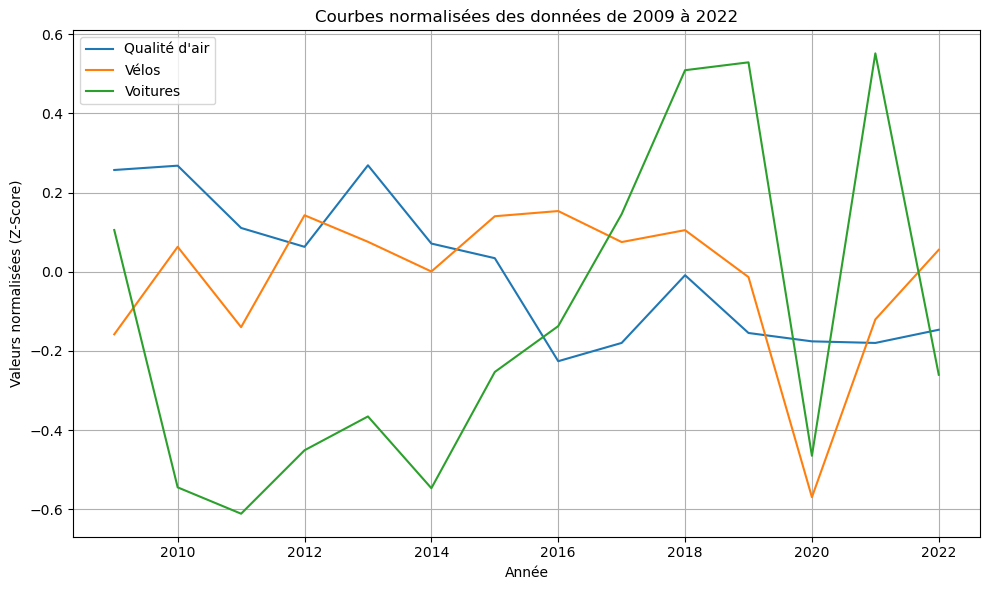

In [94]:
plt.figure(figsize=(10, 6))

# utiliser seaborn pour créer le graphique
#errorbar = None veut dire qu'on veut pas un intervalle de confiance
sns.lineplot(x='year', y='normalized_Air Qualité', data=result_df, label='Qualité d\'air', errorbar = None)
sns.lineplot(x='year', y='normalized_Vélos à Berri1', data=result_df, label='Vélos', errorbar = None)
sns.lineplot(x='year', y='normalized_Voitures', data=result_df, label='Voitures', errorbar = None)

#les titres etc. 
plt.xlabel('Année')
plt.ylabel('Valeurs normalisées (Z-Score)')
plt.title('Courbes normalisées des données de 2009 à 2022')
plt.legend()

#on veux afficher le grid
plt.grid(True)
plt.tight_layout()

# Afficher le graphique
plt.show()

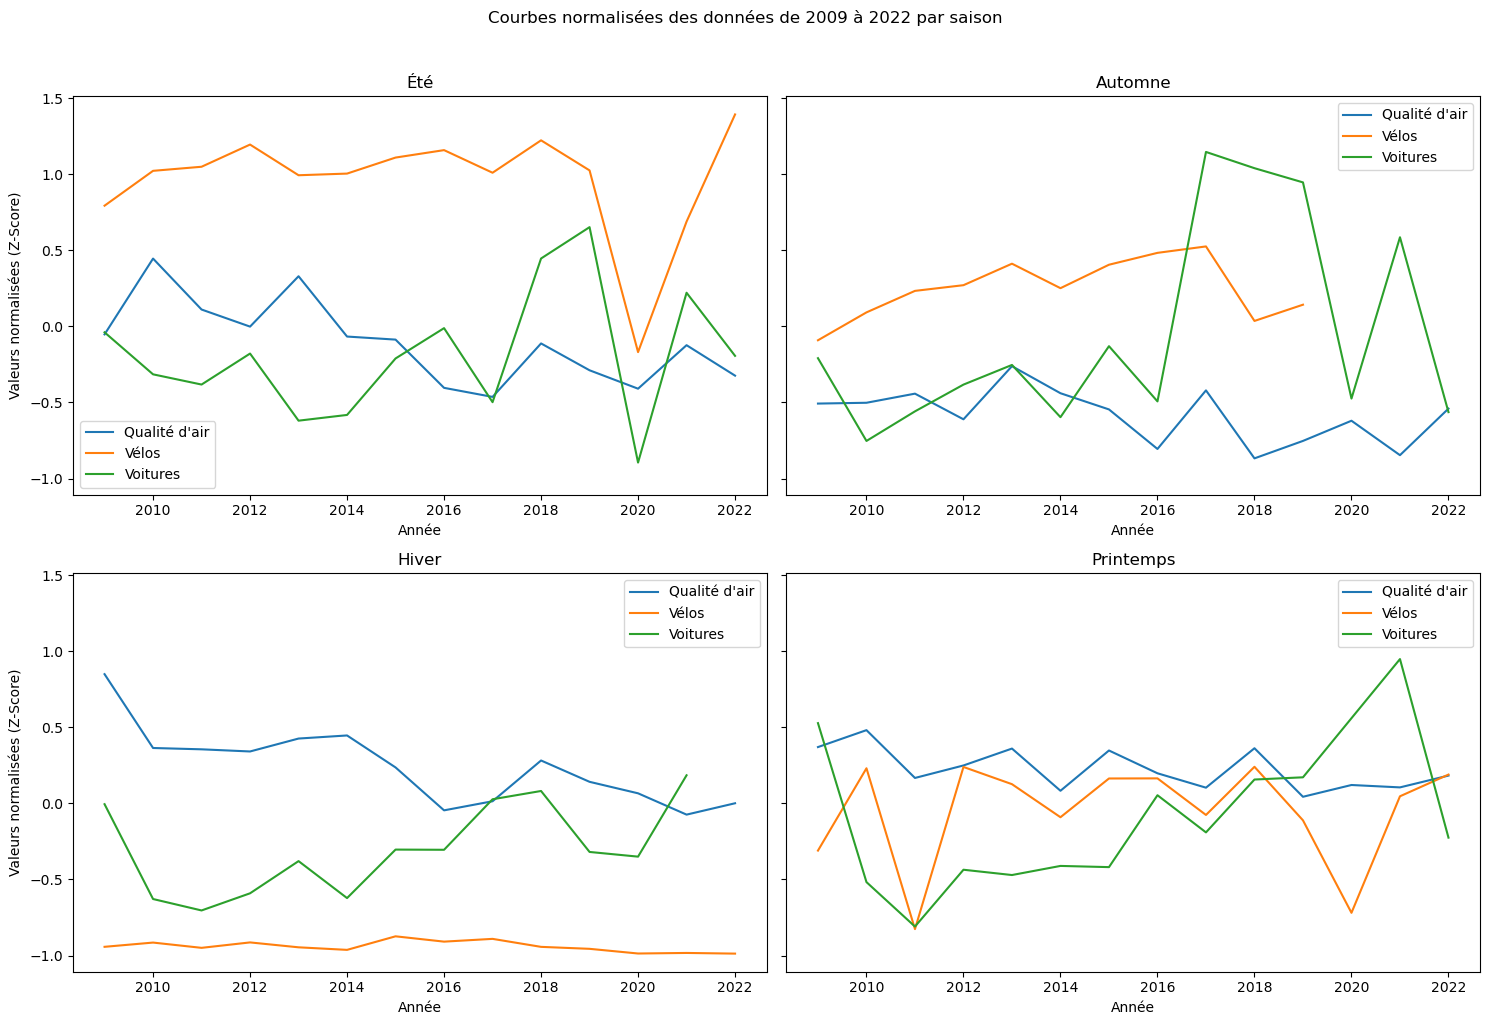

In [95]:
# Créer une figure avec des sous-intrigues
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

# on utilise seaborn
sns.lineplot(x='year', y='normalized_Air Qualité', data=result_df[result_df['season'] == 'ete'], label='Qualité d\'air', errorbar=None, ax=axes[0, 0])
sns.lineplot(x='year', y='normalized_Vélos à Berri1', data=result_df[result_df['season'] == 'ete'], label='Vélos', errorbar=None, ax=axes[0, 0])
sns.lineplot(x='year', y='normalized_Voitures', data=result_df[result_df['season'] == 'ete'], label='Voitures', errorbar=None, ax=axes[0, 0])
axes[0, 0].set_title('Été')

sns.lineplot(x='year', y='normalized_Air Qualité', data=result_df[result_df['season'] == 'automne'], label='Qualité d\'air', errorbar=None, ax=axes[0, 1])
sns.lineplot(x='year', y='normalized_Vélos à Berri1', data=result_df[result_df['season'] == 'automne'], label='Vélos', errorbar=None, ax=axes[0, 1])
sns.lineplot(x='year', y='normalized_Voitures', data=result_df[result_df['season'] == 'automne'], label='Voitures', errorbar=None, ax=axes[0, 1])
axes[0, 1].set_title('Automne')

sns.lineplot(x='year', y='normalized_Air Qualité', data=result_df[result_df['season'] == 'hiver'], label='Qualité d\'air', errorbar=None, ax=axes[1, 0])
sns.lineplot(x='year', y='normalized_Vélos à Berri1', data=result_df[result_df['season'] == 'hiver'], label='Vélos', errorbar=None, ax=axes[1, 0])
sns.lineplot(x='year', y='normalized_Voitures', data=result_df[result_df['season'] == 'hiver'], label='Voitures', errorbar=None, ax=axes[1, 0])
axes[1, 0].set_title('Hiver')

sns.lineplot(x='year', y='normalized_Air Qualité', data=result_df[result_df['season'] == 'printemps'], label='Qualité d\'air', errorbar=None, ax=axes[1, 1])
sns.lineplot(x='year', y='normalized_Vélos à Berri1', data=result_df[result_df['season'] == 'printemps'], label='Vélos', errorbar=None, ax=axes[1, 1])
sns.lineplot(x='year', y='normalized_Voitures', data=result_df[result_df['season'] == 'printemps'], label='Voitures', errorbar=None, ax=axes[1, 1])
axes[1, 1].set_title('Printemps')

# Définir les étiquettes et les titres communs
for ax in axes.flat:
    ax.set(xlabel='Année', ylabel='Valeurs normalisées (Z-Score)')
plt.suptitle('Courbes normalisées des données de 2009 à 2022 par saison', y=1.02)

# Afficher les graphiques
plt.tight_layout()
plt.show()

Un graphique normalisé est très utile pour étudier les tendances, mais nous devrions également créer des graphiques qui ne contiennent pas de variables normalisées. Mais comme elles n'ont pas la même échelle, nous devons les tracer séparément.

Text(0.5, 1.0, 'Air Qualité par Année')

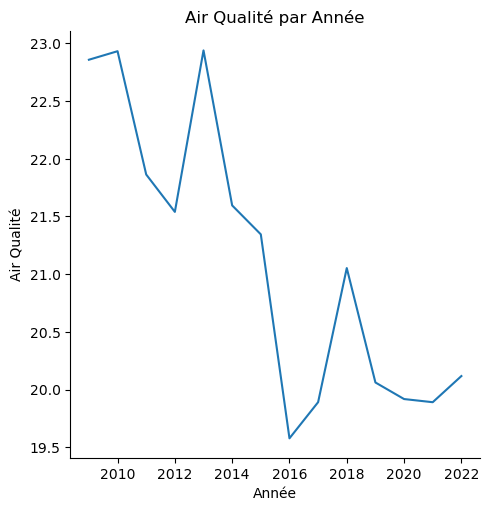

In [96]:
#Qualité de l'Air
sns.relplot(kind='line', x='year', y='Air Qualité', data=result_df, errorbar = None)

plt.xlabel('Année')
plt.ylabel('Air Qualité')
plt.title('Air Qualité par Année')

Comment interpréter l'échelle de qualité de l'air:

- Bon : De 1 à 25
- Acceptable : De 26 à 50
- Mauvais : 51 ou plus

Text(0.5, 1.0, 'Voitures par Année')

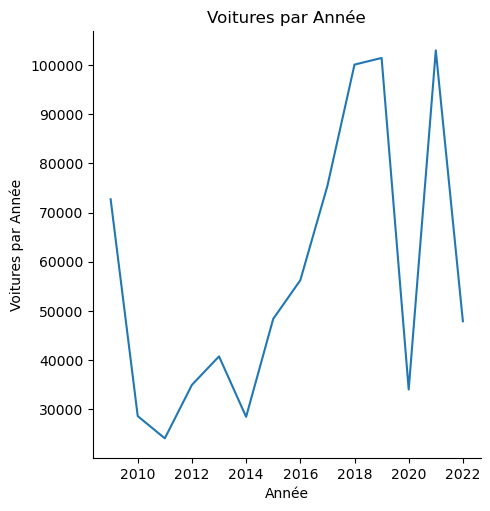

In [97]:
# Voitures
sns.relplot(kind='line', x='year', y='Voitures', data=result_df, errorbar = None)

plt.xlabel('Année')
plt.ylabel('Voitures par Année')
plt.title('Voitures par Année')

Text(0.5, 1.0, 'Vélos par Année')

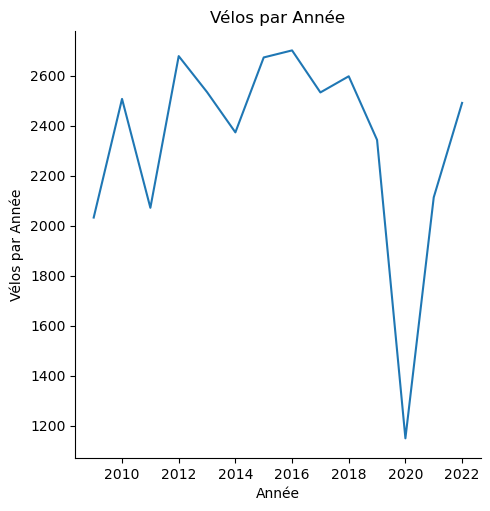

In [98]:
# Voitures
sns.relplot(kind='line', x='year', y='Vélos à Berri1', data=result_df, errorbar = None)

plt.xlabel('Année')
plt.ylabel('Vélos par Année') 
plt.title('Vélos par Année')

# Une carte
Il pourrait être intéressant de visualiser où la ville a compté les voitures et les vélos. Nous avons donc décidé d'ajouter une carte. 

In [99]:
# Créer une carte Folium centrée sur Montréal
m = folium.Map(location=[45.516216, -73.56297], zoom_start=18)

# Ajouter un circle noir autour de l'emplacement de la station de comptage de vélos
folium.Circle(
    location=[45.516216, -73.56297] ,
    popup="Vélos",
    color='black',
    radius = 30
).add_to(m)

#Obtenir la station où les voitures sont comptées
#Montréal a 150 stations où l'on compte les voitures
for index, row in df_vcp2008_2010.head(150).iterrows():
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Nom_Intersection'], radius=30,
        icon=folium.Icon(color='blue', 
                        legend_name="Viotures")
    ).add_to(m)

# Afficher 
m

# Correlation

## Par année

In [100]:
#Analyser la correlation 

#mettre les variables dans une DataFrame
moyenne_par_année = {
    'moyenne_air_qualité_année': moyenne_air_qualité_année,
    'moyenne_vélos_année': moyenne_vélos_année,
    'moyenne_voitures_année': moyenne_voitures_année
}

moyenne_par_année_df = pd.DataFrame(moyenne_par_année)

# Computer la correlation 
corrélation = moyenne_par_année_df.corr() #Source: https://www.statology.org/correlation-in-python/

# Afficher la correlation
print("Correlation Matrix par année:")
print(corrélation)

Correlation Matrix par année:
                           moyenne_air_qualité_année  moyenne_vélos_année  \
moyenne_air_qualité_année                   1.000000             0.137366   
moyenne_vélos_année                         0.137366             1.000000   
moyenne_voitures_année                     -0.424547             0.097680   

                           moyenne_voitures_année  
moyenne_air_qualité_année               -0.424547  
moyenne_vélos_année                      0.097680  
moyenne_voitures_année                   1.000000  


## Par jour

In [101]:
# Calcul de la corrélation linéaire entre Air Qualité et Vélos à Berri
correlation_air_bikes = result_df['Air Qualité'].corr(result_df['Vélos à Berri1'])

# Calcul de la corrélation linéaire entre Air Qualité et Voitures
correlation_air_cars = result_df['Air Qualité'].corr(result_df['Voitures'])

print(f"Corrélation entre Air Qualité et Vélos à Berri (linear): {correlation_air_bikes}")
print(f"Corrélation entre Air Qualité et Voitures (linear): {correlation_air_cars}")

# Calcul de la corrélation de Spearman
spearman_correlation_air_bikes = result_df['Air Qualité'].corr(result_df['Vélos à Berri1'], method='spearman')
spearman_correlation_air_cars = result_df['Air Qualité'].corr(result_df['Voitures'], method='spearman')

print(f"Corrélation entre Air Qualité et Vélos à Berri (Spearman): {spearman_correlation_air_bikes}")
print(f"Corrélation entre Air Qualité et Voitures (Spearman): {spearman_correlation_air_cars}")

Corrélation entre Air Qualité et Vélos à Berri (linear): -0.08097319255623217
Corrélation entre Air Qualité et Voitures (linear): -0.09573670872676283
Corrélation entre Air Qualité et Vélos à Berri (Spearman): -0.10582590311507807
Corrélation entre Air Qualité et Voitures (Spearman): -0.09896709390440231


# Regression (Optionnel)


Nous utiliserons une régression multiple, en contrôlant la tendance temporelle à l'aide de la variable "Date" et en utilisant des variables muettes pour tenir compte de la saisonnalité. 

En général, pour les données de séries temporelles saisonnières, une approche courante et efficace consiste à utiliser un modèle de moyenne mobile intégrée autorégressive saisonnière (SARIMA). Le modèle SARIMA est une extension du modèle ARIMA qui intègre des composantes saisonnières. Cependant, cela dépasse le cadre de ce cours. 

Le code de cette section n'a pas été enseigné dans le cours à HEC Montréal mais à l'Université de Maastricht. Cependant, nous avons pensé que l'ajout d'une régression des séries temporelles ajouterait de la valeur à ce projet. 

In [102]:
#Utiliser seulement les lignes avec des valeurs
result_df.dropna(inplace=True)

# Créer des colonnes pour chaque saison et les initialiser avec des zéros
result_df['hiver_dummy'] = 0
result_df['ete_dummy'] = 0
result_df['automne_dummy'] = 0
result_df['printemps_dummy'] = 0

#Créer des dummies pour les saisons
result_df.loc[result_df['season'] == 'hiver', 'hiver_dummy'] = 1
result_df.loc[result_df['season'] == 'ete', 'ete_dummy'] = 1
result_df.loc[result_df['season'] == 'automne', 'automne_dummy'] = 1
result_df.loc[result_df['season'] == 'printemps', 'printemps_dummy'] = 1

# selectioner les variables independentes
# on a juste besoin de trois dummies parce que la 4eme va etre la "baseline"
# on a pris printemps bour baseline
X = result_df[['Vélos à Berri1', 'Voitures', 'hiver_dummy', 'ete_dummy', 'automne_dummy', 'day', 'month', 'year']]
X = sm.add_constant(X)  # ajouter un constant term 

# la varibale dependant
y = result_df['Air Qualité']

# la régression
model = sm.OLS(y, X).fit()

# afficher le resultat 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Air Qualité   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     31.76
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.91e-45
Time:                        08:35:39   Log-Likelihood:                -3928.7
No. Observations:                1203   AIC:                             7875.
Df Residuals:                    1194   BIC:                             7921.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            572.2650    103.414      5.

Interpretation: 
1. Constant: significant et positif
2. Vélos: positif, mais c'est trop petit; pas significant
3. Voitures: negatif mais pas significant
4. Mannequins saisonniers : L'hiver a un signe positif tandis que autmne et l'été ont un coefficient négatif, ce qui signifie que l'air est meilleur en hiver qu'au printemps, et moins bon en été et autmn qu'au printemps.
5. Tendance temporelle: c'est negatif; donc, quand le temps passe, la qualité d'air sera mauvaise  

In [103]:
summary_data = {
    'Coefficient': model.params,
    'Std. Error': model.bse,
    't Value': model.tvalues,
    'P Value': model.pvalues,
}

# Créer un DataFrame à partir des données récapitulatives
summary_df = pd.DataFrame(summary_data)

# Ajouter des informations 
summary_df['Variable'] = summary_df.index  
summary_df['R-squared'] = model.rsquared

#Afficher
summary_df

,Coefficient,Std. Error,t Value,P Value,Variable,R-squared
const,572.264996,103.413693,5.533745,3.849952e-08,const,0.175439
Vélos à Berri1,0.000408,0.000127,3.223410,1.301009e-03,Vélos à Berri1,0.175439
Voitures,-0.000001,0.000003,-0.511282,6.092482e-01,Voitures,0.175439
hiver_dummy,2.445404,0.615737,3.971505,7.568929e-05,hiver_dummy,0.175439
ete_dummy,-1.795737,0.596391,-3.011005,2.658574e-03,ete_dummy,0.175439
automne_dummy,-3.614056,0.690583,-5.233338,1.965118e-07,automne_dummy,0.175439
day,-0.020002,0.022808,-0.876981,3.806733e-01,day,0.175439
month,-0.418797,0.076353,-5.484993,5.043589e-08,month,0.175439
year,-0.272249,0.051361,-5.300670,1.373360e-07,year,0.175439


In [104]:
result_df.dropna(inplace=True)


# Prendre le logarithme naturel des colonnes concernées
# Ajoutez un petit nombre au ln car parfois, leur valeur est 0 et le ln de 0 n'est pas défini.
result_df['ln_Air_Qualite'] = np.log1p(result_df['Air Qualité'])
result_df['ln_Voitures'] = np.log1p(result_df['Voitures'])
result_df['ln_Velos_a_Berri1'] = np.log1p(result_df['Vélos à Berri1'])

# selectioner les variables independentes
# on a juste besoin de trois dummies parce que la 4eme va etre la "baseline"
# on a pris printemps bour baseline
X = result_df[['ln_Velos_a_Berri1', 'ln_Voitures', 'hiver_dummy', 'ete_dummy', 'automne_dummy', 'day', 'month', 'year']]
X = sm.add_constant(X)  # Add a constant term to the predictor

# la variable dependant
y = result_df['ln_Air_Qualite']

# la régression
model = sm.OLS(y, X).fit()

# Afficher le resultat
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Air_Qualite   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     41.49
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           9.58e-59
Time:                        08:35:39   Log-Likelihood:                -46.863
No. Observations:                1203   AIC:                             111.7
Df Residuals:                    1194   BIC:                             157.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                23.9922      4.08

Interpretation: 
1. Constant: significante et positif
2. Vélos: positif, mais c'est trop petit; pas significante
3. Voitures: negatif mais pas significant
4. Mannequins saisonniers:  L'hiver a un signe positif tandis que autmne et l'été ont un coefficient négatif, ce qui signifie que l'air est meilleur en hiver qu'au printemps, et moins bon en été et autmn qu'au printemps. 
5. Tendance temporelle: c'est negatif; donc, quand le temps passe, la qualité d'air sera mauvaise  

In [105]:
summary_data = {
    'Coefficient': model.params,
    'Std. Error': model.bse,
    't Value': model.tvalues,
    'P Value': model.pvalues,
}

# Créer un DataFrame à partir des données récapitulatives
summary_df = pd.DataFrame(summary_data)

# Ajouter des informations 
summary_df['Variable'] = summary_df.index  
summary_df['R-squared'] = model.rsquared

#Afficher
summary_df

,Coefficient,Std. Error,t Value,P Value,Variable,R-squared
const,23.992200,4.081519,5.878253,5.373903e-09,const,0.217509
ln_Velos_a_Berri1,0.016349,0.007015,2.330751,1.993233e-02,ln_Velos_a_Berri1,0.217509
ln_Voitures,-0.010162,0.007294,-1.393044,1.638659e-01,ln_Voitures,0.217509
hiver_dummy,0.048753,0.023750,2.052726,4.031669e-02,hiver_dummy,0.217509
ete_dummy,-0.076437,0.022433,-3.407275,6.779981e-04,ete_dummy,0.217509
automne_dummy,-0.190816,0.027404,-6.963152,5.480576e-12,automne_dummy,0.217509
day,-0.000955,0.000906,-1.054077,2.920609e-01,day,0.217509
month,-0.020339,0.003098,-6.564491,7.767591e-11,month,0.217509
year,-0.010301,0.002034,-5.064614,4.736946e-07,year,0.217509
